# 

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
path = untar_data(URLs.PETS)
path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [4]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

In [6]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_129.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_171.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/chihuahua_182.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/leonberger_174.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_128.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=32).normalize(imagenet_stats)


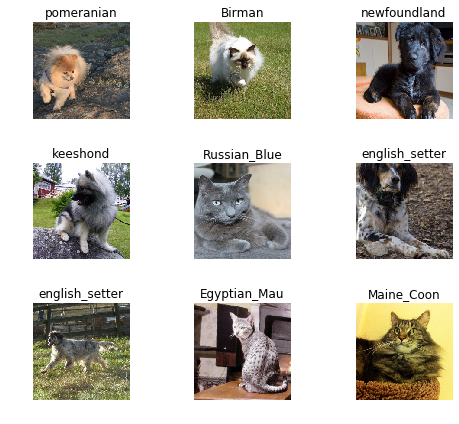

In [9]:
data.show_batch(rows=3, figsize=(7,6))

In [10]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:03<00:00, 25404125.60it/s]


In [22]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.230001,0.220788,0.063599,01:15
1,0.235293,0.200360,0.060217,01:15
2,0.219543,0.181693,0.055480,01:16
3,0.185197,0.180131,0.056157,01:15
4,0.172990,0.182760,0.054127,01:15


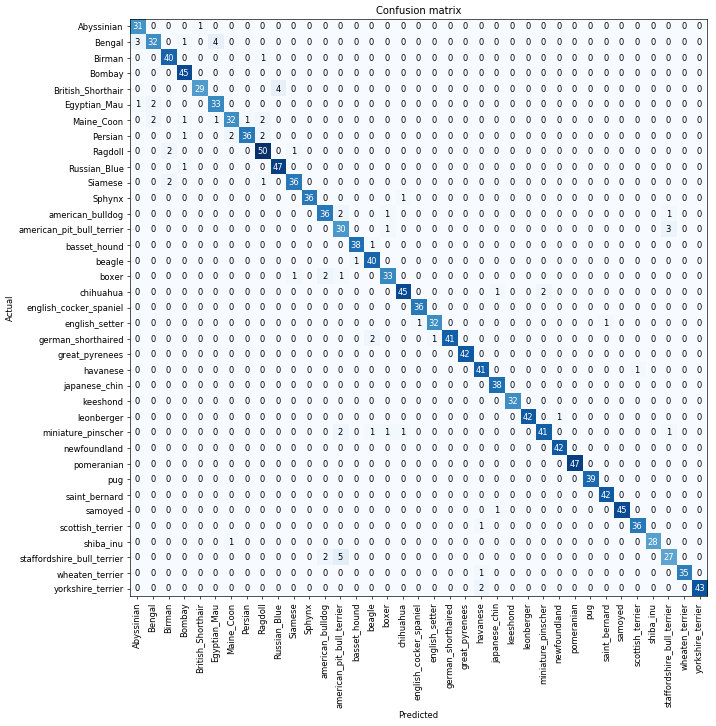

In [23]:
interp = ClassificationInterpretation.from_learner(learn)

# losses,idxs = interp.top_losses()

# len(data.valid_ds)==len(losses)==len(idxs)


interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [25]:
interp.most_confused(min_val=2)

[('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('Bengal', 'Egyptian_Mau', 4),
 ('British_Shorthair', 'Russian_Blue', 4),
 ('Bengal', 'Abyssinian', 3),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 3),
 ('Egyptian_Mau', 'Bengal', 2),
 ('Maine_Coon', 'Bengal', 2),
 ('Maine_Coon', 'Ragdoll', 2),
 ('Persian', 'Maine_Coon', 2),
 ('Persian', 'Ragdoll', 2),
 ('Ragdoll', 'Birman', 2),
 ('Siamese', 'Birman', 2),
 ('american_bulldog', 'american_pit_bull_terrier', 2),
 ('boxer', 'american_bulldog', 2),
 ('chihuahua', 'miniature_pinscher', 2),
 ('german_shorthaired', 'beagle', 2),
 ('miniature_pinscher', 'american_pit_bull_terrier', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2),
 ('yorkshire_terrier', 'havanese', 2)]